In [1]:
import numpy as np

In [2]:
x = np.load("x_data.npy")
y = np.load("y_data.npy")

In [3]:
x.shape

(301, 101, 100)

In [4]:
y.shape

(301, 100, 101)

In [5]:
x = x[:, :-1, :]
y = y[:, :, 1:]

In [6]:
x = x[20:, :, :]
y = y[20:, :, :]

In [24]:
# plot the data as cmap

import matplotlib.pyplot as plt

# make magnitude of x and y
tsx0 = x[100, :, :]
tsy0 = y[100, :, :]
mag0 = np.sqrt(tsx0**2 + tsy0**2)
mag0.shape

# rotate mag0 left by 90 deg
mag0 = np.rot90(mag0, 1)

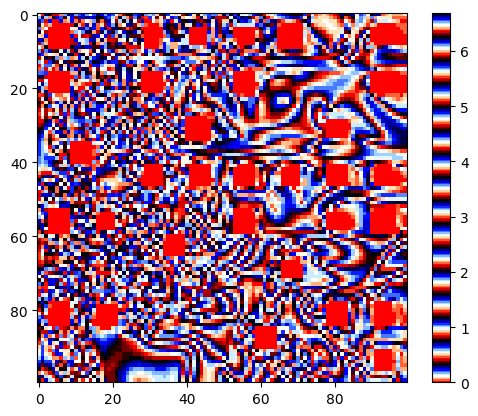

In [25]:
# cmap
plt.imshow(mag0, cmap='flag', interpolation='nearest')
plt.colorbar()

In [26]:
yy = np.load("data/windflow/city_0.npy")
yy.shape

(100, 100, 2)

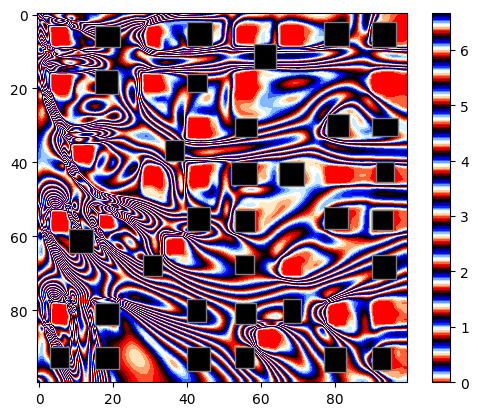

In [ ]:
# cmap
from pathlib import Path
import pandas as pd
from matplotlib.patches import Rectangle

yy = np.load("../../data/windflow/city_0.npy")
yy.shape

mag = np.linalg.norm(yy, axis=2)
mag = np.rot90(mag, 1)
# ensure corner is at bottom left
plt.imshow(mag, cmap='flag', interpolation='bicubic')
plt.colorbar()

cityscape_path = Path("data/cityscapes/city_0.csv")
buildings_df = pd.read_csv(cityscape_path)
buildings_df.columns = ["x1", "y1", "x2", "y2", "height"]

# Plot each building as a rectangle
for _, building in buildings_df.iterrows():
    
    rect_xy = (int(building["y1"]), int(building["x1"])) # swapped x and y
    rect_width = abs(building["y2"] - building["y1"]) # swapped x and y
    rect_height = abs(building["x2"] - building["x1"]) # swapped x and y

    # now rotate the above 3 values left by 90 deg

    plt.gca().add_patch(
        Rectangle(
            rect_xy,
            rect_width,
            rect_height,
            fill=True,
            facecolor="black",
            edgecolor="gray",
            linewidth=1,
        )
    )

plt.show()